**LAB-03:  Regression Analysis**

---



* Created Date: 28.02.2024
* Created By: Blessy Louis(2348416)
* edited on: 29.02.2024

**Importing necessary packages for Analysis**:


1.   Pandas: Is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
2.   Numpy:NumPy enhances Python's mathematical operations on arrays and matrices by providing a powerful data structure, a vast library of high-level functions, and efficient calculations.
3. matplotlib.pyplot: Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays.Matplotlib consists of several plots like line, bar, scatter, histogram, etc.
4.  seaborn:Python Seaborn library is a widely popular data visualization library that is commonly used for data science and machine learning tasks. You build it on top of the matplotlib data visualization library and can perform exploratory analysis.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Load Dataset:**

In this dataset, we have the data of student's  study hours and the corresponding  Exam score.


**About the loan_data.csv file:**
*   Hours:Represents the number of hours a student spent studying for the  exam.
*  Score: Indicates the student's score in the particular exam.


In [ ]:
df=pd.read_csv('score.csv')
df

Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

**Displaying first 5 rows of the dataset**

In [ ]:
df.head()

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Displaying  the first 5  number of rows  of the dataset

clearly 2.5 indicates the number of hours spent by the student to study and 21 is the corresponding marks scored .

In [ ]:
df.shape

(25, 2)

The dataset contains 25 rows and 2 features/cloumns


---


Data Description: Features in the data

In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

Checking for null values

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

clearly , we see that  the dataset have no null values , since the count of the number of null values for each feature is zero.

Displaying the information about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The above output gives us the information about the number of enteries in the dataset i,e. there are a total of 25 ranging from 0-24), the dataset includes a total of 2 columns /features

we also have the information about each feature , we can see the number of enteries(i,e. 25) , its a non null and the datatype . we can see that the datatypes available in the dataset are: float64(2), int64(1) and the memory used is 528.0 bytes

### **Univariate Analysis**

Numerical Variables:

**Understanding some  basic descriptive statistics of the dataset**

In [ ]:
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

The output  provides information about  each feature's count, minimum, maximum,mean standard deviation, and the different quartile values


count =25 represents that there are 25 enteries corresponding to the study hours feature, mean=5.012000 indicates that the mean  hours spent by students for studying is  approximately 5hrs,
The standard deviation,  indicates the  measure of the deviation of study hours around the mean, is approximately 2.525094 hours.
The minimum study hours recorded is about 1.10 hours.
25% of the data falls below 2.7 hours of study.
50% of the data falls below 4.8 hours of study.
75% of the data falls below 7.4 hours of study.
The maximum study hours recorded is around 9.2 hours., here the feature of pass/ fail is considered as an indicator , hence we do not require the descriptive measures of that feature

Visualize distribution using histograms

The histogram shows a skewed distribution with higher quantities, indicating a common clustering point. The width of the histogram indicates data spread, while outliers are extreme values far from the majority. The choice of bins, such as 20 bins, can influence the distribution's appearance. Overall, the histogram provides a visual representation of the dataset's quantity values, providing insights into their typical range and shape.

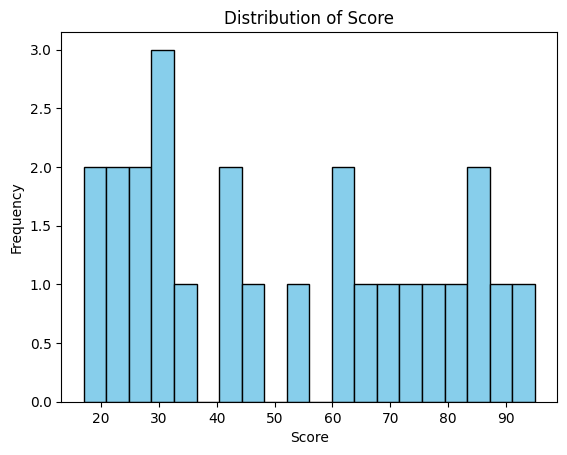

In [ ]:
plt.hist(df['Scores'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Score')
plt.show()

the distribution described by the graph  has a slight right skew and is platykurtic, indicating a distribution that is somewhat asymmetrical with lighter tails and a flatter peak compared to a normal distribution.
we also observe at values between 35-40  frequency is zero indicating the non occurence of these values,also the same for 55-60

In [ ]:
mean = np.mean(df['Scores'])
std_dev = np.std(df['Scores'])
skewness = np.mean((df['Scores'] - mean) ** 3) / (std_dev ** 3)
kurtosis = np.mean((df['Scores'] - mean) ** 4) / (std_dev ** 4) - 3


print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Skewness: 0.22
Kurtosis: -1.40


a skewness of 0.22, it suggests a slight right skew, indicating that the distribution is slightly asymmetrical with a longer right tail.
With a kurtosis of -1.40, it suggests a distribution that is platykurtic. This means that compared to a normal distribution, the tails of the distribution are lighter, and the peak is flatter.

Kernel Plot

The kernel density plot of revenue provides a smooth estimate of the probability density function of revenue values, revealing the distribution of the data. Peaks indicate densely concentrated regions, while the width of the curve indicates data variability. The symmetry of the distribution can be inferred from the shape, and the height of the curve at any point represents the relative density of the data points.

<ipython-input-14-999fdcd826ea>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Hours'], color='orange', shade=True)


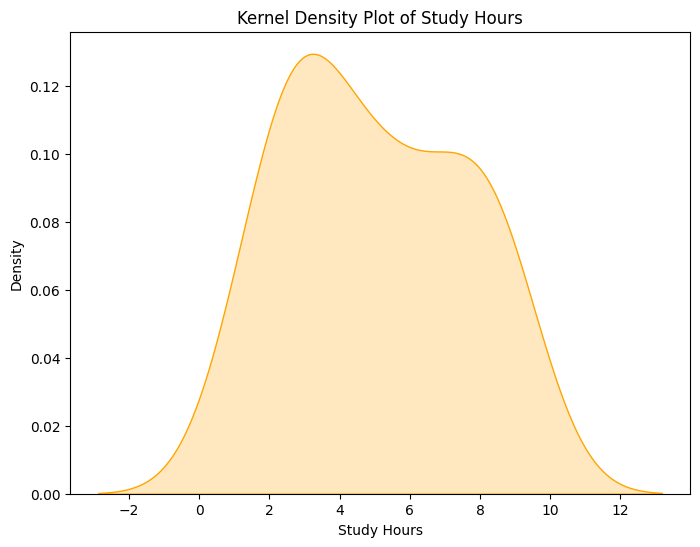

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Hours'], color='orange', shade=True)
plt.xlabel('Study Hours')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Study Hours')
plt.show()

Overall, the graph suggests a distribution where most of the data is concentrated around the mean, with a few data points pulling the distribution slightly to the right, and the spread of values is relatively low compared to a normal distribution.

In [ ]:
mean = np.mean(df['Hours'])
std_dev = np.std(df['Hours'])
skewness = np.mean((df['Hours'] - mean) ** 3) / (std_dev ** 3)
kurtosis = np.mean((df['Hours'] - mean) ** 4) / (std_dev ** 4) - 3


print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Skewness: 0.18
Kurtosis: -1.29


With a skewness of 0.18, the distribution is slightly positively skewed. This suggests that the tail of the distribution is slightly longer on the right side, meaning there may be a few data points with higher values that are pulling the mean towards the right.

The kurtosis of -1.29 indicates a platykurtic distribution. In this case, the distribution has thinner tails and a flatter peak compared to a normal distribution. It implies that the data is less clustered around the mean, and there are fewer extreme values or outliers compared to a normal distribution.

## Categorical Variables:

Display frequency tables:





In [ ]:
Scores_freq = df['Scores'].value_counts(normalize=True)
print(Scores_freq)

30    0.12
21    0.04
41    0.04
76    0.04
35    0.04
54    0.04
69    0.04
67    0.04
24    0.04
95    0.04
17    0.04
42    0.04
62    0.04
47    0.04
85    0.04
25    0.04
81    0.04
60    0.04
88    0.04
20    0.04
75    0.04
27    0.04
86    0.04
Name: Scores, dtype: float64


Visualize using bar plots

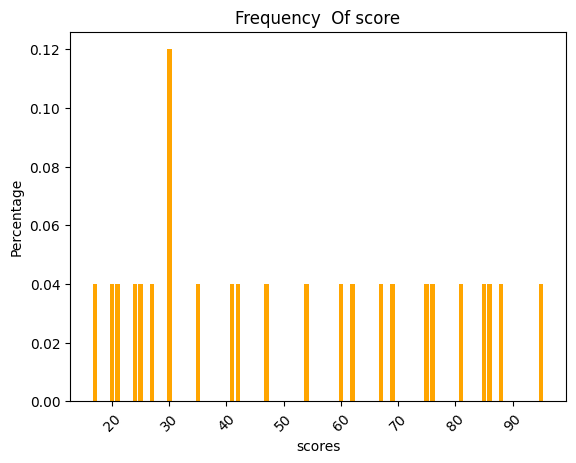

In [ ]:

plt.bar(Scores_freq.index, Scores_freq.values, color='orange')
plt.xlabel('scores')
plt.ylabel('Percentage')
plt.title('Frequency  Of score')
plt.xticks(rotation=45)
plt.show()

The bar plot displays the frequency of  scores of student in the  dataset, with taller bars indicating higher frequency. It allows easy comparison of areas, revealing their distribution across the dataset. Dominant area with the tallest bars are the most frequent. The x-axis labels are rotated for better readability. This visual representation aids in identifying dominant areas and comparing their frequency across the dataset.
Clearly we see that the area of Fail has the maximum occurrences in the dataset.

Visualizing using Kernel Density Plot

<ipython-input-18-976beaed4264>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Scores_freq.values, color='orange', shade=True)


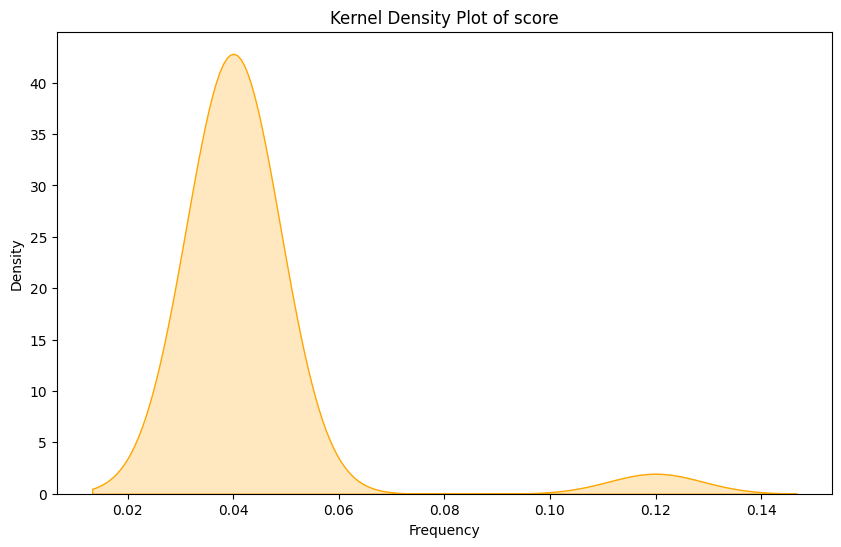

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=Scores_freq.values, color='orange', shade=True)
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.title('Kernel Density Plot of score')
plt.show()

The kernel density plot of property are  frequencies provides a smooth estimate of the probability density function, revealing the distribution of frequencies. Peaks indicate densely concentrated regions, while the width of the curve indicates data variability. The symmetry of the distribution can be inferred from the shape, with a centered curve and a skewed one. The height of the curve at any point represents the relative density of frequencies. Clearly the distribution of the frequencies maybe almost symmetric  and leptokurtic but have longer tails to the right side and the maximum number of data values are clustered with a freequency of 0.4-0.6

### **Bivariate Analysis:**

* Explore relationships between pairs of numerical variables:

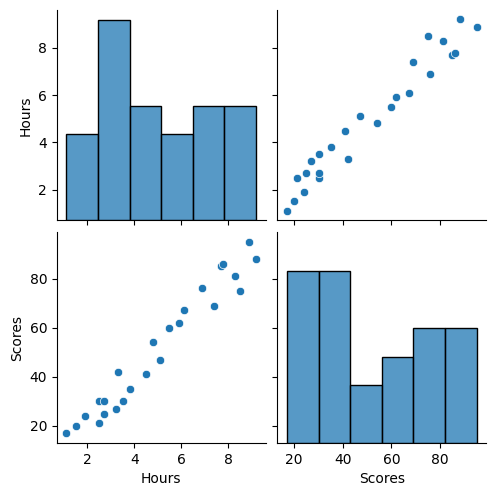

In [ ]:
sns.pairplot(df[['Hours', 'Scores']])
plt.show()

The pair plot represents the pair wise relationship between the  features , we can see a linear relationship between the hours of study and scores

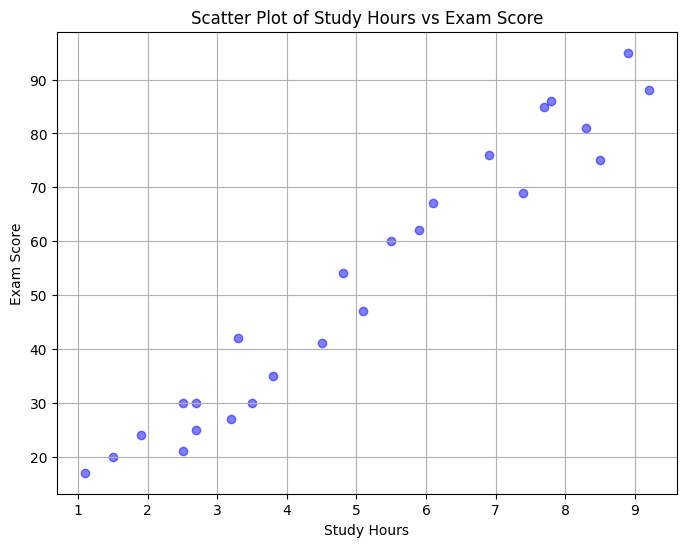

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Hours'], df['Scores'], color='blue', alpha=0.5)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Scatter Plot of Study Hours vs Exam Score')
plt.grid(True)
plt.show()

The scatter plot indicates a linear relatioship betweeen the hours of study and  marks scored

Calculate correlation coefficients between numerical variables:

In [ ]:
correlation_matrix = df[['Hours', 'Scores']].corr()
print(correlation_matrix)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


we observe that the correlation coefficient = 0.976191,which is very large  quantity, therefore we can conclude that there is high positive correlation between   study hours and exam score

since the relation between the 2 variables is linear , we can use the linear regression model for analysis

Regression Anaysis

we take the hours to be the independent vairable(X)

In [ ]:
X=df[['Hours']]
X.shape

(25, 1)

Taking the scores as the dependent variable(Y)

In [ ]:
Y=df['Scores']
Y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

Splitting the dataset into training and testing dataset

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Using simple linear Regression

In [ ]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression(n_jobs=-1)

Fitting the Training dataset to the model

In [ ]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [9.68207815]
Intercept: 2.826892353899737


The coefficient in the analysis is approximately 9.68. This means that for every one-unit increase in the independent variable x, the dependent variable y is expected to increase by approximately 9.68 units.

The intercept,2.83, represents the value of the dependent variable y when the independent variable x is zero. In many cases, especially in real-world applications, having an x value of zero might not make sense, and the interpretation of the intercept could be limited.

So, in simpler terms, the interpretation of your linear regression analysis could be something like: "For every one-unit increase in x, we expect y to increase by approximately 9.68 units, and when x is zero, we expect y to be approximately 2.83."










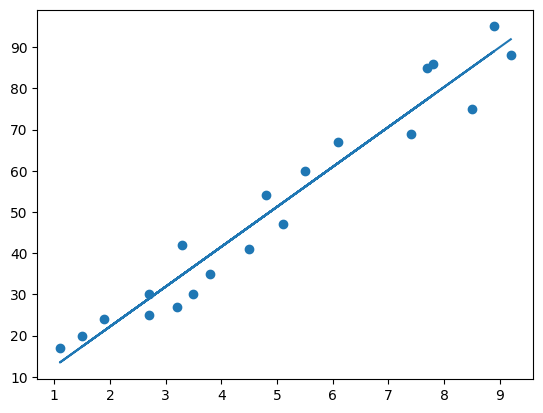

In [ ]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

Clearly the linear regression model fits the dataset  perfectly

prediction of test data



In [ ]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [ ]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [ ]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print( "Mean Squared Error is : ",mse)
print("Mean Absolute Error is : ",mae)


Mean Squared Error is :  18.943211722315272
Mean Absolute Error is :  3.9207511902099244


In a regression analysis, several metrics are commonly used to evaluate the performance of the model:

1. **Mean Squared Error (MSE)**: This measures the average squared difference between the actual values and the predicted values by the model. A lower MSE indicates better performance.

   In this case, the MSE is approximately \(18.94\), suggesting that, on average, the squared difference between the actual and predicted values is \(18.94\).

2. **Mean Absolute Error (MAE)**: This measures the average absolute difference between the actual values and the predicted values by the model. Again, a lower MAE indicates better performance.

   The  MAE is approximately \(3.92\), meaning that, on average, the absolute difference between the actual and predicted values is approximately \(3.92\).

.

In summary, based on these metrics:

- The model's predictions have an average squared difference from the actual values of \(18.94\).
- The average absolute difference between the actual and predicted values is approximately \(3.92\).
- The model explains around \(43.5\%\) of the variance in the dependent variable, suggesting moderate predictive power.

These metrics provide insights into the performance and accuracy of your regression model, allowing you to assess its effectiveness in capturing the relationship between the independent and dependent variables.

R square

Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

R-squared is a statistical measure that indicates how much of the variation of a dependent variable is explained by an independent variable in a regression model

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(y_test,y_pred)
print("R Square Score: ",score)

R Square Score:  0.9678055545167994


A \( R^2 \) (R-squared) score of \( 0.968 \) indicates that approximately \( 96.8\% \) of the variance in the dependent variable is explained by the independent variable(s) in your model. This is a very high \( R^2 \) score, suggesting that your model provides an excellent fit to the data and has strong predictive power.

In practical terms, this means that the model is highly effective at explaining the variability in the dependent variable based on the independent variable(s) it considers. It indicates that the model captures most of the patterns and relationships present in the data, making it a reliable tool for prediction or inference.

However, it's essential to consider other factors such as the context of the problem, the domain knowledge, and the possibility of overfitting when interpreting the \( R^2 \) score. Nonetheless, a \( R^2 \) score of \( 0.968 \) generally suggests a robust and well-fitted model.

In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9570740726890659

In [ ]:
## OLS Linear Regression
import statsmodels.api as sm

In [ ]:
model=sm.OLS(y_train,X_train).fit()

In [ ]:
prediction=model.predict(X_test)
print(prediction)

8     84.132271
16    25.341045
0     25.341045
23    69.941285
11    59.804867
dtype: float64


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Scores   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1821.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):                    2.46e-20
Time:                        05:46:25   Log-Likelihood:                         -63.367
No. Observations:                  20   AIC:                                      128.7
Df Residuals:                      19   BIC:                                      129.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R-squared (uncentered): This statistic measures the proportion of the variance in the dependent variable (scores) that is explained by the independent variable (hours). In this case, approximately 99% of the variance in scores can be explained by hours of study.

Adjusted R-squared (uncentered): This is a modified version of R-squared that adjusts for the number of predictors in the model. It penalizes the addition of unnecessary predictors that do not improve the model's fit. In this case, the adjusted R-squared is approximately 99%, indicating a very good fit.

F-statistic: This is a test statistic that determines whether the overall regression model is statistically significant. It compares the fit of the intercept-only model (null model) with the fit of the current model. Here, the F-statistic is very high (1821), and the associated p-value is close to zero, indicating that the regression model is statistically significant.

Coefficient (coef): The coefficient for the independent variable (hours) represents the change in the dependent variable (scores) for a one-unit change in the independent variable. In this case, for each additional hour of study, the scores are expected to increase by approximately 10.1364 units.

t-value: This measures the number of standard deviations the coefficient is away from zero. A higher absolute t-value indicates that the coefficient is more statistically significant. Here, the t-value for the coefficient of hours is very high (42.679), indicating its significance.

p-value (P>|t|): This indicates the significance of the coefficient estimate. In this case, the p-value associated with hours is very close to zero, indicating that the coefficient is statistically significant.

Confidence Intervals: These intervals provide a range of values within which the true population parameter is likely to fall. For the coefficient of hours, the 95% confidence interval is between 9.639 and 10.634.

Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis, Cond. No.: These are additional diagnostic statistics that provide information about the regression model's goodness of fit and assumptions. They can be used to assess the reliability of the regression results, but they are not directly related to the interpretation of the coefficients.

In summary, based on this regression analysis, there is a strong and statistically significant positive relationship between the number of hours studied and the scores obtained. For every additional hour of study, the scores are expected to increase by approximately 10.1364 units.






In [ ]:
regression.predict([[6.89]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.53641084])

the value indicates that for 6.89 hrs of study the exam score is 69.4012